In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import wrangle_excs as wrangle

**5 questions about the data** 
- 1) Does each county have different prices
- 2) Do large plots of land have cause a difference in pricing
- 3) does year built have a relationship with structure tax value.
- 4) does city have a relationship with tax value, i also want to look at combining city and county and see how that looks
- 5) do houses with higher square footage and more bedrooms have higher tax value
- 6) does building quality id type have an effect on the log error

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
train,validate,test = wrangle.train_validate_test_split(df)

In [4]:
sample = train[0:5000]

In [5]:
sample.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,1964.0,284087.0,644943.0,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,1962.0,100450.0,462860.0,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,1973.0,52753.0,86273.0,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,1949.0,71787.0,164570.0,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,1983.0,87847.0,392467.0,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange


In [6]:
df.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county'],
      dtype='object')

<AxesSubplot:xlabel='county', ylabel='logerror'>

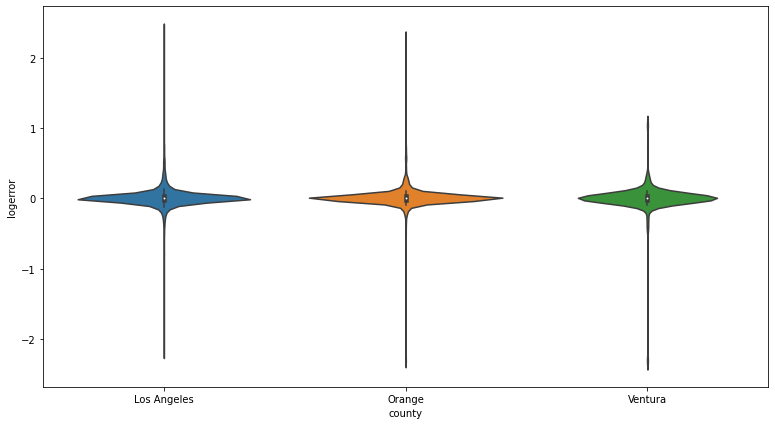

In [7]:
plt.figure(figsize = (13,7))
sns.violinplot(data = sample, y = "logerror", x = "county")

<AxesSubplot:xlabel='county', ylabel='logerror'>

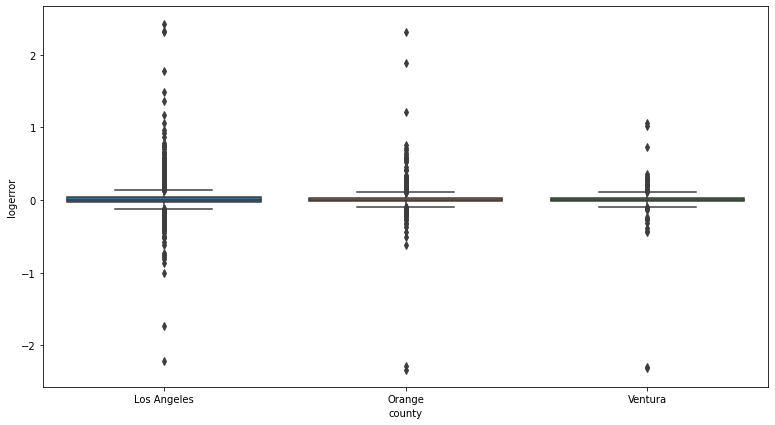

In [8]:
plt.figure(figsize = (13,7))
sns.boxplot(data=sample, y = "logerror", x = "county")

<AxesSubplot:xlabel='county', ylabel='logerror'>

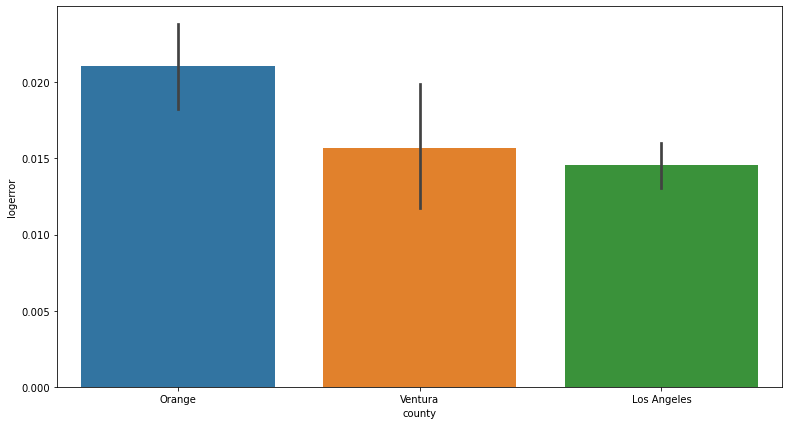

In [9]:
plt.figure(figsize = (13,7))
sns.barplot(data = df, y = "logerror", x = "county")

**Takeaways**
It seems like the barplot shows some disparity in pricing between the counties lets run some stats tests to confirm this
- $H_0$ there is no difference in tax value between counties
- $H_a$ there is a difference in tax value between counties

In [10]:
train.county.value_counts()

Los Angeles    26536
Orange         11833
Ventura         3344
Name: county, dtype: int64

In [11]:
orange_county = df[df.county == "Orange"]

In [12]:
ventura_county = df[df.county == "Ventura"]

In [13]:
los_angeles_county = df[df.county == "Los Angeles"]

In [14]:
stats.ttest_ind(
    orange_county.logerror,
    ventura_county.logerror,
    equal_var=True,
)

Ttest_indResult(statistic=1.996934447020766, pvalue=0.04584291680095866)

In [15]:
stats.ttest_ind(
    orange_county.logerror,
    los_angeles_county.logerror,
    equal_var=True,
)

Ttest_indResult(statistic=4.576700899805783, pvalue=4.73254645158003e-06)

In [16]:
stats.ttest_ind(
    ventura_county.logerror,
    los_angeles_county.logerror,
    equal_var=True,
)

Ttest_indResult(statistic=0.5022314736448555, pvalue=0.615506930140135)

**CONCLUSION**
- There is a difference in logerror between orange count and los angeles
- there seems to be no relationship for ventura and los angeles

<AxesSubplot:title={'center':'Is there a relationship\nbetween lot size and tax value?'}, xlabel='lotsizesquarefeet', ylabel='logerror'>

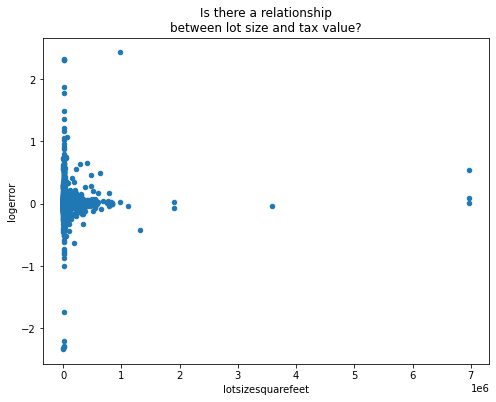

In [17]:
sample.plot.scatter(
    x="lotsizesquarefeet",
    y="logerror",
    title='Is there a relationship\nbetween lot size and tax value?',
    figsize=(8, 6),
)

<AxesSubplot:ylabel='Frequency'>

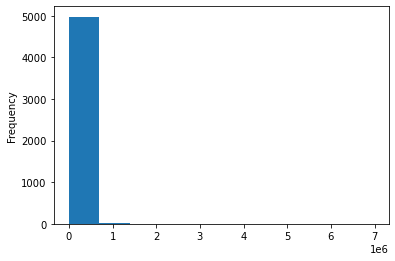

In [18]:
sample.lotsizesquarefeet.plot.hist()

In [19]:
sample['lot_size_bin'] = pd.cut(sample.lotsizesquarefeet, [0, 6000, 10000, 1000000])

<AxesSubplot:title={'center':'Distributions of lot size bin'}>

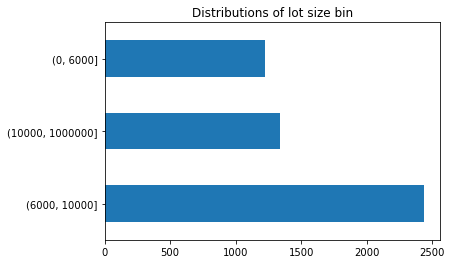

In [20]:
sample.lot_size_bin.value_counts().plot.barh(title = "Distributions of lot size bin")

<AxesSubplot:xlabel='lot_size_bin', ylabel='logerror'>

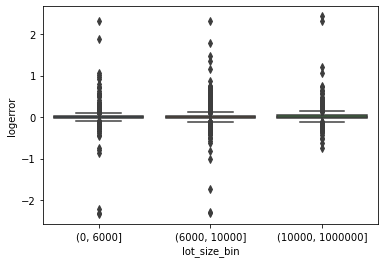

In [21]:
sns.boxplot(data=sample, y='logerror', x='lot_size_bin')

In [22]:
small_lot = train[train.lotsizesquarefeet <= 6000]

In [23]:
large_lot = train[train.lotsizesquarefeet > 10000]

In [24]:
stats.levene(
    small_lot.logerror,
    large_lot.logerror,
)

LeveneResult(statistic=5.201961237158149, pvalue=0.022571001205876864)

In [25]:
stats.ttest_ind(
    small_lot.logerror,
    large_lot.logerror,
    equal_var=True,
)

Ttest_indResult(statistic=-2.9119718766210285, pvalue=0.0035951821514465126)

**Takeaways**
- There does seem to be a difference in taxvalue with a higher tax value for large lots compared to the smaller lot size.

<AxesSubplot:>

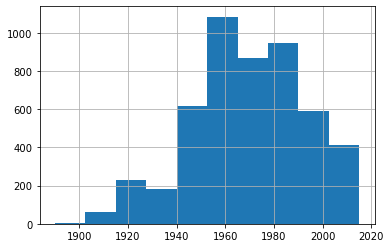

In [26]:
sample.yearbuilt.hist()

In [27]:
sample['year_built_bin'] = pd.cut(sample.yearbuilt, [1880, 1950, 1990, 2020])

In [28]:
sample.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county,lot_size_bin,year_built_bin
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,644943.0,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles,"(6000, 10000]","(1950, 1990]"
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,462860.0,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange,"(6000, 10000]","(1950, 1990]"
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,86273.0,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles,"(0, 6000]","(1950, 1990]"
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,164570.0,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles,"(6000, 10000]","(1880, 1950]"
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,392467.0,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange,"(6000, 10000]","(1950, 1990]"


<AxesSubplot:title={'center':'Distributions of year built bin'}>

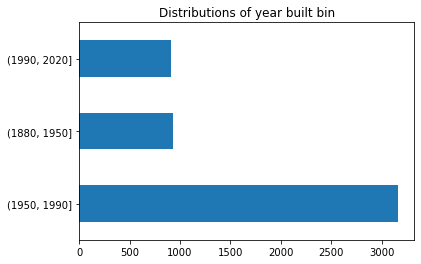

In [29]:
sample.year_built_bin.value_counts().plot.barh(title = "Distributions of year built bin")

<AxesSubplot:xlabel='year_built_bin', ylabel='logerror'>

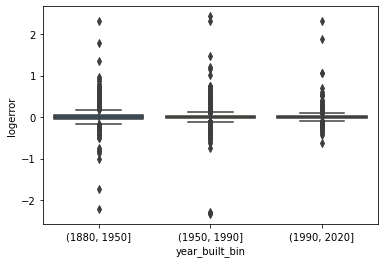

In [30]:
sns.boxplot(data=sample, y='logerror', x='year_built_bin')

<AxesSubplot:xlabel='year_built_bin', ylabel='logerror'>

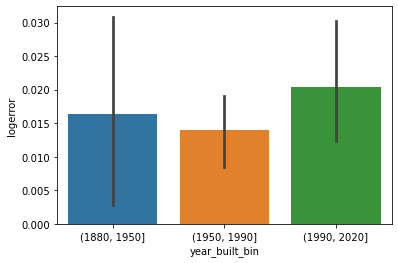

In [31]:
sns.barplot(data = sample, y='logerror', x='year_built_bin')

**Takeaways**
- There is a pretty large difference between the houses built in the 1990s to 2020 compared to the other two groups.
- It seems that the units built in the 1880s to 1950s are valued slightly higher then the 1950s to 1990s group.

<AxesSubplot:title={'center':'Is there a relationship between age and spending score?'}, xlabel='regionidcity', ylabel='logerror'>

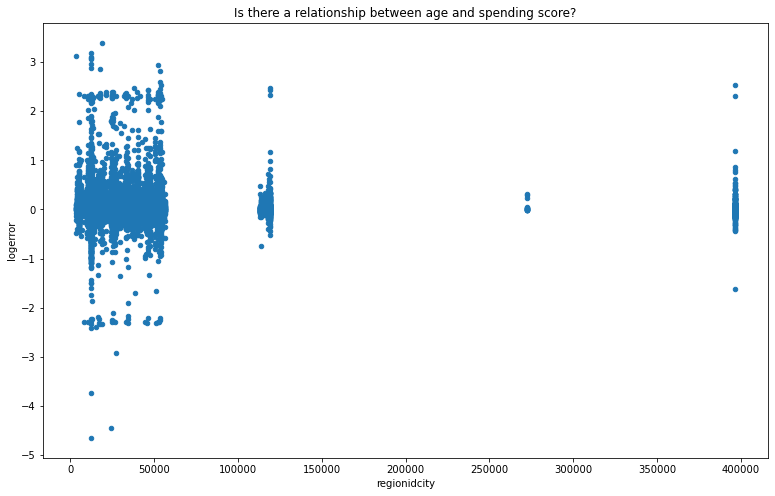

In [32]:
df.plot.scatter(y='logerror', x='regionidcity', title='Is there a relationship between age and spending score?', figsize=(13, 8))

In [33]:
city_sample = sample[sample.regionidcity < 70000]

<Figure size 936x504 with 0 Axes>

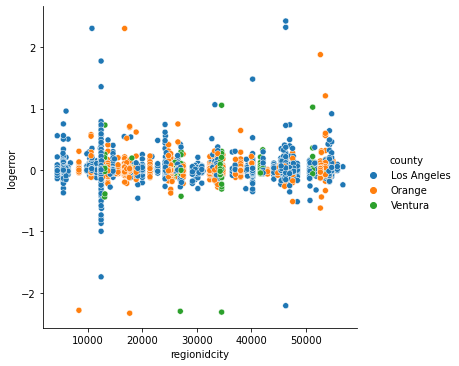

In [34]:
plt.figure(figsize = (13,7))
sns.relplot(data=city_sample, y='logerror', x='regionidcity', hue = "county")

Text(0.5, 1.0, 'how does our city and county compare with tax value')

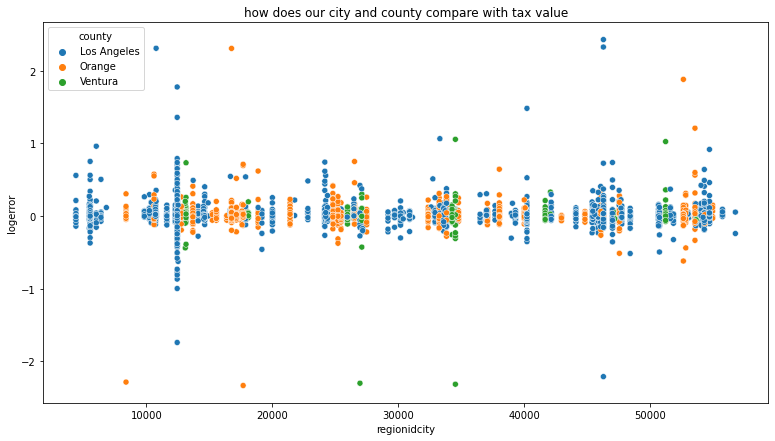

In [35]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='regionidcity',
    y='logerror',
    data=city_sample,
    hue='county',
)
plt.title("how does our city and county compare with tax value")

**Takeaways**
- seems like some cities have a wide range of log errors where others are calculated pretty tightly

In [36]:
sample.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county', 'lot_size_bin', 'year_built_bin'],
      dtype='object')

In [37]:
sample.calculatedfinishedsquarefeet

42186    2064.0
17405    1920.0
15241    1425.0
22227     838.0
76503     935.0
          ...  
17254    1181.0
51459    2031.0
51080    2173.0
47424     974.0
47476    1160.0
Name: calculatedfinishedsquarefeet, Length: 5000, dtype: float64

In [38]:
bedroom_sample = sample[sample.bedroomcnt <= 6]

Text(0.5, 1.0, 'how does our squarefootage and bathroom count compare with log error')

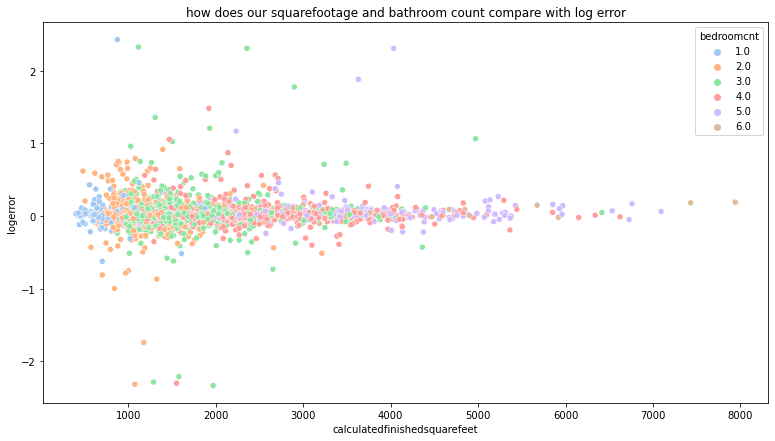

In [39]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample,
    hue='bedroomcnt',
    palette = "pastel"
)
plt.title("how does our squarefootage and bathroom count compare with log error")

In [40]:
bedroom_sample['bed_room_bin'] = pd.cut(bedroom_sample.bedroomcnt, [0,2,4,6])

Text(0.5, 1.0, 'how does our city and county compare with tax value')

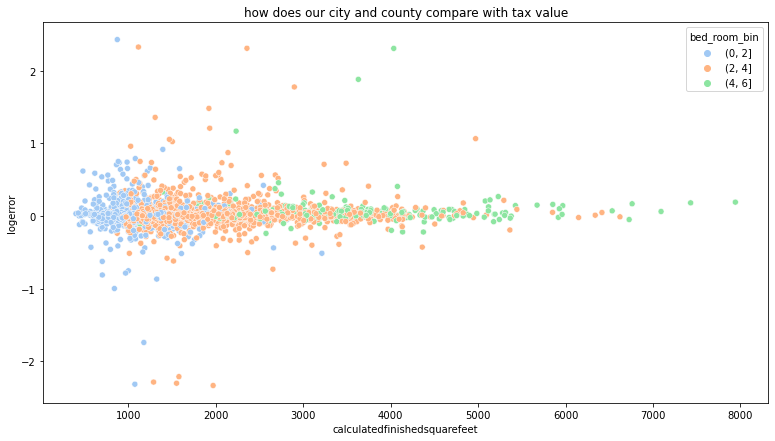

In [41]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample,
    hue='bed_room_bin',
    palette = "pastel"
)
plt.title("how does our city and county compare with tax value")

In [42]:
# maybe theres a difference in the counties lets see

In [43]:
bedroom_sample_orange = bedroom_sample[bedroom_sample.county == "Orange"]

In [44]:
bedroom_sample_ventura = bedroom_sample[bedroom_sample.county == "Ventura"]

In [45]:
bedroom_sample_los_angeles = bedroom_sample[bedroom_sample.county == "Los Angeles"]

Text(0.5, 1.0, 'how does our squarefootage and bathroom count compare with log error in orange county')

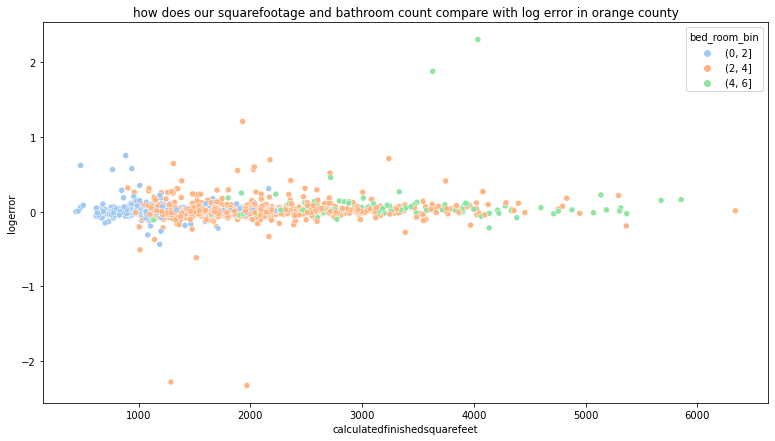

In [46]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample_orange,
    hue='bed_room_bin',
    palette = "pastel"
)
plt.title("how does our squarefootage and bathroom count compare with log error in orange county")

Text(0.5, 1.0, 'how does our squarefootage and bathroom count compare with log error in ventura')

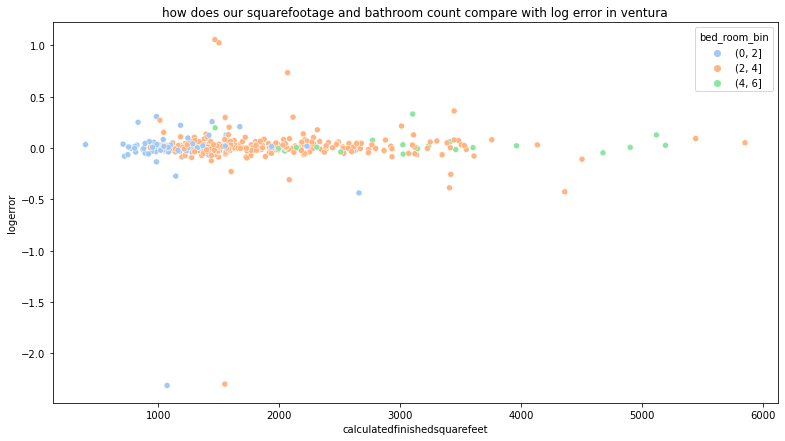

In [47]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample_ventura,
    hue='bed_room_bin',
    palette = "pastel"
)
plt.title("how does our squarefootage and bathroom count compare with log error in ventura")

Text(0.5, 1.0, 'how does our squarefootage and bathroom count compare with log error in los angeles')

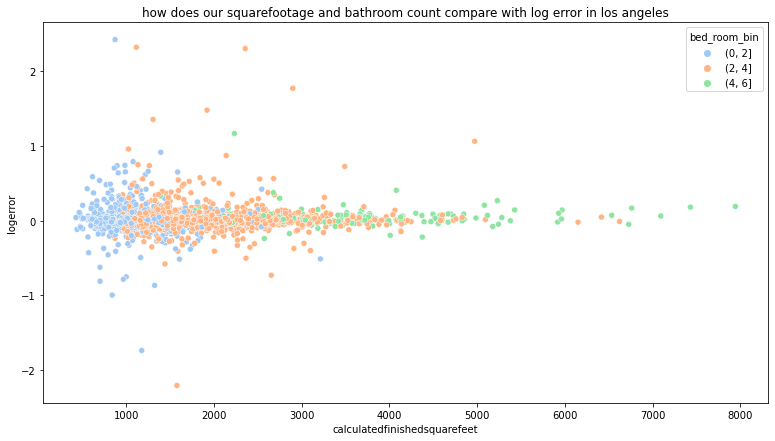

In [48]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample_los_angeles,
    hue='bed_room_bin',
    palette = "pastel"
)
plt.title("how does our squarefootage and bathroom count compare with log error in los angeles")

Text(0.5, 1.0, 'how does our city and county compare with tax value')

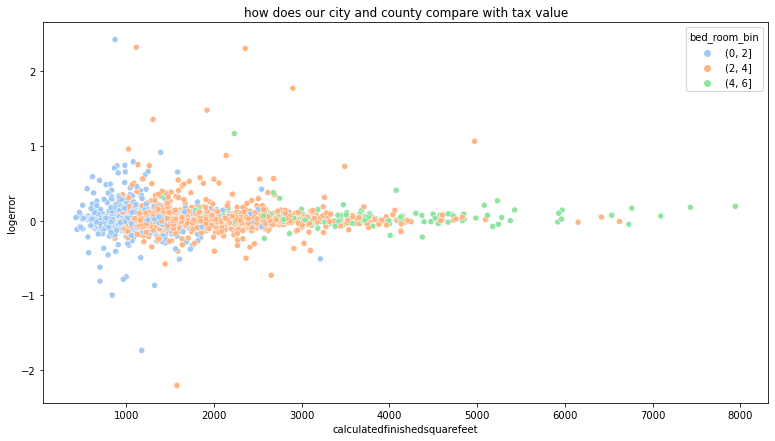

In [49]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='calculatedfinishedsquarefeet',
    y='logerror',
    data=bedroom_sample_los_angeles,
    hue='bed_room_bin',
    palette = "pastel"
)
plt.title("how does our city and county compare with tax value")

**Takeaways**
- It looks like log error for the 0-2 bedroom has the largest variance
- after that it looks like the 2-4, while the 4-6 bedroom count units have a very low log error
- The log error seems to be higher on smaller homes
- When i broke the data down by county i found that the log error for orange county and ventura were very small, except for some extreme "outlier" values for ventura
- the log error for los angeles seems to very on smaller houses.

In [50]:
sample.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county', 'lot_size_bin', 'year_built_bin'],
      dtype='object')

In [51]:
# structuretaxvaluedollarcnt logerror and buildingqualitytypeid

Text(0.5, 1.0, 'how does structure tax value and log error compare')

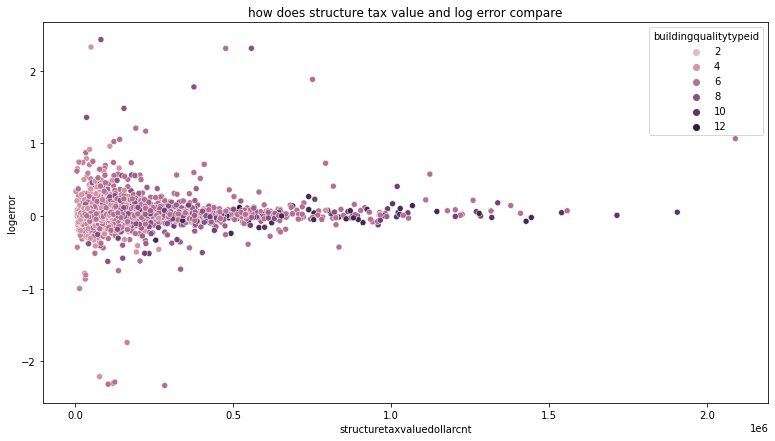

In [52]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='structuretaxvaluedollarcnt',
    y='logerror',
    data=sample,
    hue='buildingqualitytypeid',
)
plt.title("how does structure tax value and log error compare")

**Takeaways**
- its difficult to gain good insite here the log error is very low

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

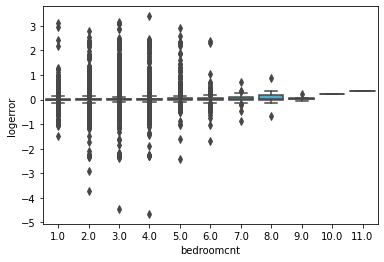

In [53]:
sns.boxplot(data=df, y='logerror', x='bedroomcnt')

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

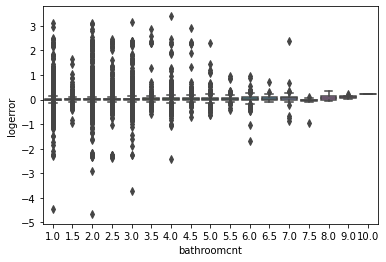

In [54]:
sns.boxplot(data=df, y='logerror', x='bathroomcnt')

**Takeaways**
- We are going to need more filtering to gain insite from these graphs

In [68]:
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county'],
      dtype='object')

Text(0.5, 1.0, 'how does structure tax value and log error compare')

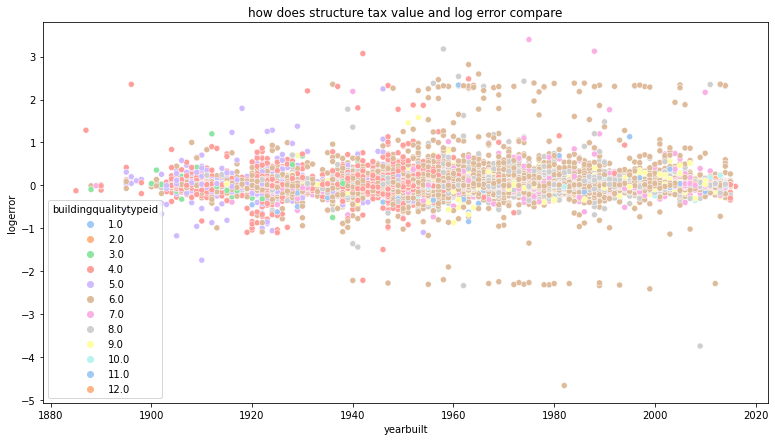

In [73]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='buildingqualitytypeid',
    palette = "pastel"
)
plt.title("how does structure tax value and log error compare")

In [74]:
train["building_quality_bin"] = pd.cut(train.buildingqualitytypeid, [0,4,8,12])

Text(0.5, 1.0, 'how does structure tax value and log error compare')

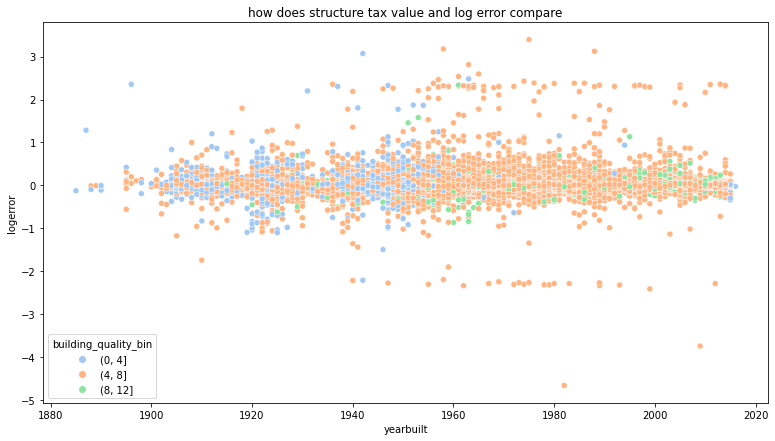

In [75]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='yearbuilt',
    y='logerror',
    data=train,
    hue='building_quality_bin',
    palette = "pastel"
)
plt.title("how does structure tax value and log error compare")

In [116]:
stats.f_oneway(*[x for quality, x in train.groupby("building_quality_bin").logerror])

F_onewayResult(statistic=0.5495382129359393, pvalue=0.5772204790081921)

In [ ]:
stats.ttest_ind(
    i.logerror,
    mean_logerror,
    equal_var=True,)

**Takeaways**
- The model they built might have a hard time valueing homes that are in the 4-8 quality column as you can see by the large amount of data that is on the outskirts of our graph
- it looks like the model has the best efficency in calculating the 8-12 value units.

In [108]:
sample.columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'county', 'lot_size_bin', 'year_built_bin',
       'building_quality_bin'],
      dtype='object')

<AxesSubplot:>

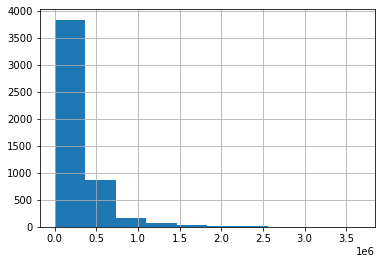

In [112]:
sample.landtaxvaluedollarcnt.hist()

Text(0.5, 1.0, 'how does structure tax value and log error compare')

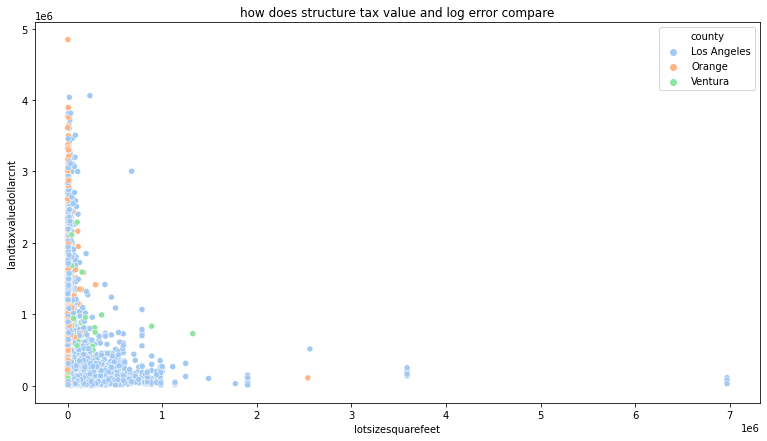

In [114]:
plt.figure(figsize = (13,7))
sns.scatterplot(
    x='lotsizesquarefeet',
    y='landtaxvaluedollarcnt',
    data=train,
    hue='county',
    palette = "pastel"
)
plt.title("how does structure tax value and log error compare")

In [111]:
sample.regionidzip.value_counts()

97319.0    66
97329.0    53
97318.0    52
96987.0    51
96993.0    41
           ..
96012.0     1
96951.0     1
95991.0     1
96002.0     1
96973.0     1
Name: regionidzip, Length: 370, dtype: int64

In [64]:
zip_logerror = df.groupby("regionidzip").logerror.mean()

In [89]:
zip_logerror = pd.DataFrame(zip_logerror)

In [94]:
zip_logerror = zip_logerror.reset_index()

In [97]:
zip_logerror

,regionidzip,logerror
0,95982.0,0.000776
1,95983.0,0.005095
2,95984.0,-0.077274
3,95985.0,-0.019039
4,95986.0,0.043699
...,...,...
381,97329.0,0.017858
382,97330.0,0.013530
383,97331.0,0.045914
384,97344.0,0.025212


In [95]:
mean_logerror = df.logerror.mean()

In [105]:
for i in zip_logerror.logerror:
    stats.ttest_ind(
    i.logerror,
    mean_logerror,
    equal_var=True,)
    print(zip_logerror.regionzip)

AttributeError: 'float' object has no attribute 'logerror'

In [107]:
for i in zip_logerror.logerror:
    print(i)

0.0007759151104452196
0.005094740088844839
-0.07727412961806653
-0.01903912722133357
0.04369887255868243
-0.006291050845027598
0.04086212122108873
-0.025976139175639602
0.02185808726392937
-0.011774389330928692
-0.011558747332648705
-0.01220863242171817
-0.07120780093618714
0.031268895320338184
-0.013868123656910657
0.004528147406145821
0.013497217995476207
0.023625154687862596
-0.0051756340746864915
0.01239581035005665
0.03171996528856873
0.10011251564694687
0.006099401398645736
0.0014310723571343805
-0.0331917323033795
0.00018479463307045154
-0.017956737269249755
-0.040945198296424665
-0.010358481583426223
-0.025821542743230442
-0.026324793310223395
0.012975975776910153
0.0038551162569671004
0.0017756526426911594
0.01787858517191001
-0.10389199899210207
-0.03477967313609481
0.05556416939162721
-0.01743135093145178
0.01493718503532509
0.0157530782880755
0.019221468647758137
-0.006195299184464512
0.039522589386861644
0.0074577565048115505
-0.0031637993430050754
0.02848479154152047
0.01